In [2]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')


C:\Users\Manish\AppData\Local\Temp\ipykernel_13984\2048849175.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
db = mysql.connector.connect(host = '18.136.157.135',
                            user = 'dm_team2',
                            password = 'DM!$Team&27@9!20!',
                            database = 'project_sales')


In [4]:
table = pd.read_sql_query('show tables',db)
print(table)

  Tables_in_project_sales
0                    data


In [5]:
table_name = 'data'
table_details = pd.read_sql_query(f'DESCRIBE {table_name}', db)
print(table_details)

           Field          Type Null Key Default Extra
0        Created  varchar(150)  YES        None      
1     Product_ID  varchar(150)  YES        None      
2         Source  varchar(150)  YES        None      
3         Mobile  varchar(150)  YES        None      
4          EMAIL  varchar(150)  YES        None      
5    Sales_Agent  varchar(255)  YES        None      
6       Location  varchar(255)  YES        None      
7  Delivery_Mode  varchar(255)  YES        None      
8         Status  varchar(255)  YES        None      


In [6]:
query = 'select * from data'
data = pd.read_sql(query, db)
print(data)

               Created Product_ID            Source      Mobile  \
0     14-11-2018 10:05                      Website  984XXXXXXX   
1     14-11-2018 09:22                      Website     XXXXXXX   
2     14-11-2018 09:21                      Website     XXXXXXX   
3     14-11-2018 08:46                      Website     XXXXXXX   
4     14-11-2018 07:34                      Website     XXXXXXX   
...                ...        ...               ...         ...   
7417  28-04-2018 09:45          9              Call               
7418  28-04-2018 09:43         15              Call               
7419  28-04-2018 09:20          5  Live Chat-Direct               
7420  28-04-2018 08:04         21          CRM form               
7421  28-04-2018 07:54         25           Website               

                   EMAIL     Sales_Agent         Location Delivery_Mode  \
0     aXXXXXXX@gmail.com  Sales-Agent-11                         Mode-5   
1                #VALUE!  Sales-Agent-10     

In [7]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_column",None)
data.head()

Created Product_ID   Source      Mobile               EMAIL  \
0  14-11-2018 10:05             Website  984XXXXXXX  aXXXXXXX@gmail.com   
1  14-11-2018 09:22             Website     XXXXXXX             #VALUE!   
2  14-11-2018 09:21             Website     XXXXXXX  dXXXXXXX@yahoo.com   
3  14-11-2018 08:46             Website     XXXXXXX  wXXXXXXX@gmail.com   
4  14-11-2018 07:34             Website     XXXXXXX  cXXXXXXX@gmail.com   

      Sales_Agent Location Delivery_Mode Status  
0  Sales-Agent-11                 Mode-5   Open  
1  Sales-Agent-10                 Mode-5   Open  
2  Sales-Agent-10                 Mode-5   Open  
3  Sales-Agent-10                 Mode-5   Open  
4  Sales-Agent-10                 Mode-5   Open

In [84]:
data.to_csv('imported_data.csv',index=False)

In [85]:
data=pd.read_csv('imported_data.csv')

Created:

Data type: Object (this represents the timestamp when the lead was created).
Description: This feature likely indicates the date and time when the lead was generated or entered into the system.
Product_ID:

Data type: Float64.
Description: This feature represents the ID or code of the product associated with the lead. It indicates which product or service the lead is interested in.
Source:

Data type: Object.
Description: This feature denotes the source or channel through which the lead was generated. It could include sources such as website visits, social media platforms, email campaigns, referrals, etc.
Mobile:

Data type: Object.
Description: This feature indicates whether the lead provided a mobile number as part of their contact information. It could be a binary indicator (e.g., "Yes" or "No").
EMAIL:

Data type: Object.
Description: This feature likely represents the email address of the lead. It serves as a unique identifier for each lead and can be used for communication and follow-up.
Sales_Agent:

Data type: Object.
Description: This feature identifies the sales agent or representative responsible for managing the lead. It helps track the performance of individual sales agents and their interactions with leads.
Location:

Data type: Object.
Description: This feature specifies the location or geographic region associated with the lead. It could include details such as city, state, country, etc.
Delivery_Mode:

Data type: Object.
Description: This feature indicates the mode or method of delivery for the product or service associated with the lead. It could include options such as in-person delivery, online delivery, shipping, etc.
Status:

Data type: Object.
Description: This feature represents the current status or stage of the lead in the sales pipeline. It indicates whether the lead is active, qualified, converted into a customer, lost, etc.

In [47]:
data['Status'].value_counts()

Status
Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: count, dtype: int64

In [86]:
import pandas as pd
from datetime import datetime

# Assuming df is your DataFrame containing the dataset and "Created" column is in datetime format
# Convert "Created" column to datetime format if not already
data['Created'] = pd.to_datetime(data['Created'])

# Calculate the number of days since the creation date until today's date
today = datetime.today()
data['Days_Since_Creation'] = (today - data['Created']).dt.days

# Drop the original "Created" column if you no longer need it
data.drop(columns=['Created'], inplace=True)

# Print the DataFrame to verify the changes
print(data.head())


   Product_ID   Source      Mobile               EMAIL     Sales_Agent  \
0         NaN  Website  984XXXXXXX  aXXXXXXX@gmail.com  Sales-Agent-11   
1         NaN  Website     XXXXXXX             #VALUE!  Sales-Agent-10   
2         NaN  Website     XXXXXXX  dXXXXXXX@yahoo.com  Sales-Agent-10   
3         NaN  Website     XXXXXXX  wXXXXXXX@gmail.com  Sales-Agent-10   
4         NaN  Website     XXXXXXX  cXXXXXXX@gmail.com  Sales-Agent-10   

  Location Delivery_Mode Status  Days_Since_Creation  
0      NaN        Mode-5   Open                 1918  
1      NaN        Mode-5   Open                 1918  
2      NaN        Mode-5   Open                 1918  
3      NaN        Mode-5   Open                 1918  
4      NaN        Mode-5   Open                 1918  


In [122]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_ID           7422 non-null   float64
 1   Source               7422 non-null   int32  
 2   Mobile               7422 non-null   int32  
 3   EMAIL                7422 non-null   int32  
 4   Sales_Agent          7422 non-null   int32  
 5   Location             7422 non-null   int32  
 6   Delivery_Mode        7422 non-null   int32  
 7   Status               7422 non-null   object 
 8   Days_Since_Creation  7422 non-null   int64  
dtypes: float64(1), int32(6), int64(1), object(1)
memory usage: 348.0+ KB


<Axes: xlabel='Product_ID', ylabel='Count'>

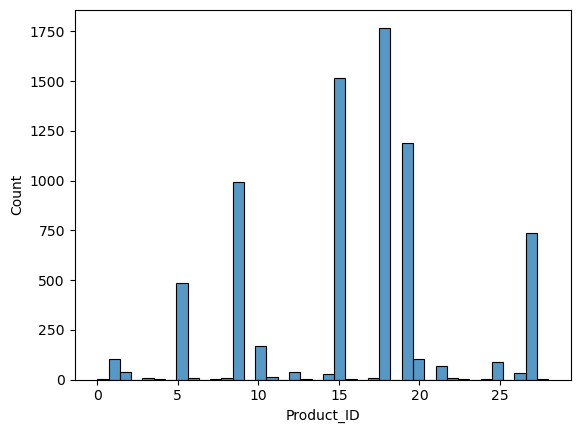

In [18]:
sns.histplot(data['Product_ID'])

In [12]:
data['Product_ID'].value_counts()

Product_ID
18.0    1711
15.0    1518
19.0    1189
9.0      992
27.0     739
5.0      487
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
17.0       7
6.0        7
8.0        6
13.0       5
24.0       3
16.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: count, dtype: int64

In [87]:
data.loc[data['Product_ID'].isnull()==True,'Product_ID']=18


In [121]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_column",None)
data



Product_ID  Source  Mobile  EMAIL  Sales_Agent  Location  Delivery_Mode  \
0           18.0      24       1      1            2        10              4   
1           18.0      24       0      0            1        10              4   
2           18.0      24       0      1            1        10              4   
3           18.0      24       0      1            1        10              4   
4           18.0      24       0      1            1        10              4   
5           18.0      24       0      1            1        10              4   
6           18.0      24       0      1            1        10              4   
7           18.0      24       0      1            1        10              4   
8           18.0      24       1      1            1        10              4   
9           18.0      24       0      1            1        10              4   
10          18.0      24       0      1            1        10              4   
11          18.0      24       0      1            1        10              4   
12          18.0      24       1      1            1        10              4   
13          18.0       2       0      0            1        10              4   
14          18.0      24       1      1            1        10              4   
15          18.0       2       0      0            1        10              4   
16          18.0      24       0      0            1        10              4   
17          18.0      24       0      0            1        10              4   
18           9.0      16       1      1            5         1              0   
19          19.0       2       1      0            6        10              4   
20          18.0      24       1      1            1        10              4   
21          18.0       2       0      0            1        10              4   
22          18.0      24       1      1            1        10              4   
23          18.0       2       1      1           11        14              2   
24          18.0      24       1      1            2        13              0   
25          15.0      24       1      1            9         6              0   
26          18.0       2       1      1            9         1              0   
27          18.0      14       0      1           11        10              2   
28          27.0       2       1      1            2         2              4   
29          19.0      14       1      1            6        15              1   
30          19.0      14       1      1            6        15              3   
31          18.0       2       1      0            9         1              0   
32          27.0      14       1      0            2         6              2   
33           9.0       0       1      1            9         1              3   
34           9.0       2       1      0            6         1              0   
35           9.0      24       1      1            2         1              0   
36          19.0      24       1      1            9        10              0   
37          18.0      16       1      1           11         1              0   
38           5.0      14       0      1            9        16              2   
39          19.0      14       1      1            6         3              3   
40           9.0       2       1      1            6         2              4   
41           9.0      14       0      1            2        14              2   
42          18.0       2       1      0           11         2              0   
43           2.0       2       1      0           11        10              4   
44           9.0       2       1      1            2         1              4   
45          15.0       2       1      0            2        10              4   
46          15.0       2       1      0            9        10              4   
47          19.0      14       1      1            6        13              4   
48          15.0       2       1     

In [19]:
data['Source'].value_counts()

Source
Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: count, dtype: int64

In [89]:
data.loc[data['Source'].isnull()==True,'Source']='Call'

In [90]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame containing the dataset and "Source" is the feature to be encoded
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the "Source" feature
data['Source'] = label_encoder.fit_transform(data['Source'])

# Print the DataFrame to verify the changes



In [98]:
data.loc[data['EMAIL']=='#VALUE!','EMAIL']=0

In [99]:
data.loc[data['EMAIL'] != 0,'EMAIL']=1

In [92]:
contains_integer_mask = data['Mobile'].str.contains('\d', na=False)

In [93]:
data.loc[~contains_integer_mask, 'Mobile'] = 0

In [95]:
data.loc[data['Mobile']!=0, 'Mobile'] = 1

In [64]:
data['EMAIL'].unique()

array([1], dtype=object)

In [103]:
data.to_csv('CLEAN1.csv',index=False)

In [104]:
data['Sales_Agent'].value_counts()

Sales_Agent
Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: count, dtype: int64

In [111]:
data.loc[data['Location'].isnull()==True,'Location']='Other Locations'

In [116]:
data['Delivery_Mode'] = label_encoder.fit_transform(data['Delivery_Mode'])

In [110]:
data['Location'].value_counts()

Location
Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64

In [117]:
data['Status'] = data['Status'].replace({'CONVERTED': 1, 'Potential': 1, 'In Progress Positive': 1,
                                     'Junk Lead': 0, 'Not Responding': 0, 'Just Enquiry': 0,
                                     'Long Term': 0, 'In Progress Negative': 0, 'LOST': 0})



In [126]:
data.loc[data['Status']=='converted','Status']=1


In [127]:
data['Status']=data['Status'].astype('int')

In [128]:
data['Status'].unique()

array([0, 1])

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features_to_scale = data.drop(['Status'], axis=1)

# Fit and transform the scaler on the selected features
scaled_features = scaler.fit_transform(features_to_scale)

# Replace the original features with the scaled features
data[features_to_scale.columns] = scaled_features


In [130]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_column",None)
data



Product_ID    Source  Mobile  EMAIL  Sales_Agent  Location  \
0       0.642857  1.000000     1.0    1.0     0.181818    0.6250   
1       0.642857  1.000000     0.0    0.0     0.090909    0.6250   
2       0.642857  1.000000     0.0    1.0     0.090909    0.6250   
3       0.642857  1.000000     0.0    1.0     0.090909    0.6250   
4       0.642857  1.000000     0.0    1.0     0.090909    0.6250   
5       0.642857  1.000000     0.0    1.0     0.090909    0.6250   
6       0.642857  1.000000     0.0    1.0     0.090909    0.6250   
7       0.642857  1.000000     0.0    1.0     0.090909    0.6250   
8       0.642857  1.000000     1.0    1.0     0.090909    0.6250   
9       0.642857  1.000000     0.0    1.0     0.090909    0.6250   
10      0.642857  1.000000     0.0    1.0     0.090909    0.6250   
11      0.642857  1.000000     0.0    1.0     0.090909    0.6250   
12      0.642857  1.000000     1.0    1.0     0.090909    0.6250   
13      0.642857  0.083333     0.0    0.0     0.090909    0.6250   
14      0.642857  1.000000     1.0    1.0     0.090909    0.6250   
15      0.642857  0.083333     0.0    0.0     0.090909    0.6250   
16      0.642857  1.000000     0.0    0.0     0.090909    0.6250   
17      0.642857  1.000000     0.0    0.0     0.090909    0.6250   
18      0.321429  0.666667     1.0    1.0     0.454545    0.0625   
19      0.678571  0.083333     1.0    0.0     0.545455    0.6250   
20      0.642857  1.000000     1.0    1.0     0.090909    0.6250   
21      0.642857  0.083333     0.0    0.0     0.090909    0.6250   
22      0.642857  1.000000     1.0    1.0     0.090909    0.6250   
23      0.642857  0.083333     1.0    1.0     1.000000    0.8750   
24      0.642857  1.000000     1.0    1.0     0.181818    0.8125   
25      0.535714  1.000000     1.0    1.0     0.818182    0.3750   
26      0.642857  0.083333     1.0    1.0     0.818182    0.0625   
27      0.642857  0.583333     0.0    1.0     1.000000    0.6250   
28      0.964286  0.083333     1.0    1.0     0.181818    0.1250   
29      0.678571  0.583333     1.0    1.0     0.545455    0.9375   
30      0.678571  0.583333     1.0    1.0     0.545455    0.9375   
31      0.642857  0.083333     1.0    0.0     0.818182    0.0625   
32      0.964286  0.583333     1.0    0.0     0.181818    0.3750   
33      0.321429  0.000000     1.0    1.0     0.818182    0.0625   
34      0.321429  0.083333     1.0    0.0     0.545455    0.0625   
35      0.321429  1.000000     1.0    1.0     0.181818    0.0625   
36      0.678571  1.000000     1.0    1.0     0.818182    0.6250   
37      0.642857  0.666667     1.0    1.0     1.000000    0.0625   
38      0.178571  0.583333     0.0    1.0     0.818182    1.0000   
39      0.678571  0.583333     1.0    1.0     0.545455    0.1875   
40      0.321429  0.083333     1.0    1.0     0.545455    0.1250   
41      0.321429  0.583333     0.0    1.0     0.181818    0.8750   
42      0.642857  0.083333     1.0    0.0     1.000000    0.1250   
43      0.071429  0.083333     1.0    0.0     1.000000    0.6250   
44      0.321429  0.083333     1.0    1.0     0.181818    0.0625   
45      0.535714  0.083333     1.0    0.0     0.181818    0.6250   
46      0.535714  0.083333     1.0    0.0     0.818182    0.6250   
47      0.678571  0.583333     1.0    1.0     0.545455    0.8125   
48      0.535714  0.083333     1.0    0.0     0.818182    0.6250   
49      0.107143  0.083333     1.0    0.0     0.545455    0.6250   
50      0.642857  0.083333     1.0    0.0     0.545455    0.0625   
51      0.535714  0.083333     1.0    0.0     0.181818    0.6250   
52      0.321429  0.083333     1.0    0.0     0.545455    0.5625   
53      0.535714  0.083333     1.0    0.0     0.818182    0.6250   
54      0.321429  0.083333     1.0    1.0     1.000000    0.0625   
55      0.678571  0.083333     1.0    0.0     1.000000    0.0625   
56      0.321429  0.166667     0.0    1.0     1.000000    0.1250   
57      0.178571  0.583333     1.0    1.0     1.000000    0.87

In [ ]:
new_data=np.array([0.6])

In [131]:
data.to_csv('final_cleaned.csv',index=False)

In [2]:
data=pd.read_csv('final_cleaned.csv')

In [132]:
data['Status'].value_counts()

Status
0    5219
1    2203
Name: count, dtype: int64

In [3]:
from imblearn.over_sampling import SMOTE

# Assuming 'X' is your feature matrix and 'y' is your target variable
smote = SMOTE(random_state=42)

In [134]:
pip install --upgrade scikit-learn

In [135]:
pip install --upgrade imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/92/e8/86c36e1b13007ca9c89381adac6c078cfc8fb71841a76c08a3fe3eca91d3/imbalanced_learn-0.12.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.0-py3-none-any.whl.metadata (8.2 kB)
Using cached imbalanced_learn-0.12.0-py3-none-any.whl (257 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [4]:
X=data.drop('Status',axis=1)
y=data['Status']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [8]:
y_train.value_counts()

Status
0    4204
1    4204
Name: count, dtype: int64

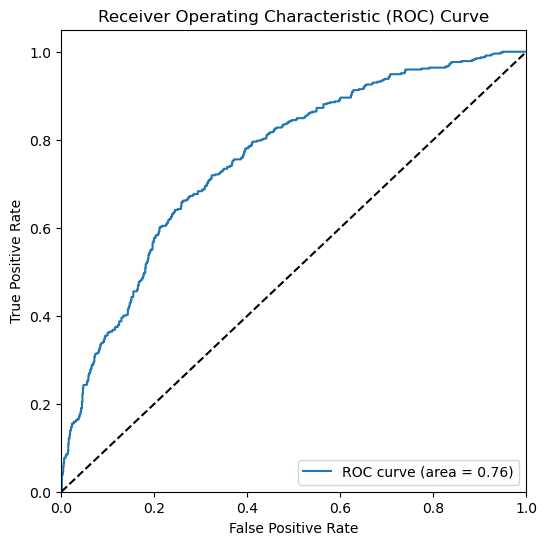

Train Accuracy: 0.7338723260906181
Test Accuracy: 0.7279461279461279
Confusion Matrix:
[[951  64]
 [340 130]]
ROC AUC Score: 0.7560800754637879


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Predictions
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# ROC Curve
y_test_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_test_prob)

# Visualization
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("ROC AUC Score:", roc_auc)


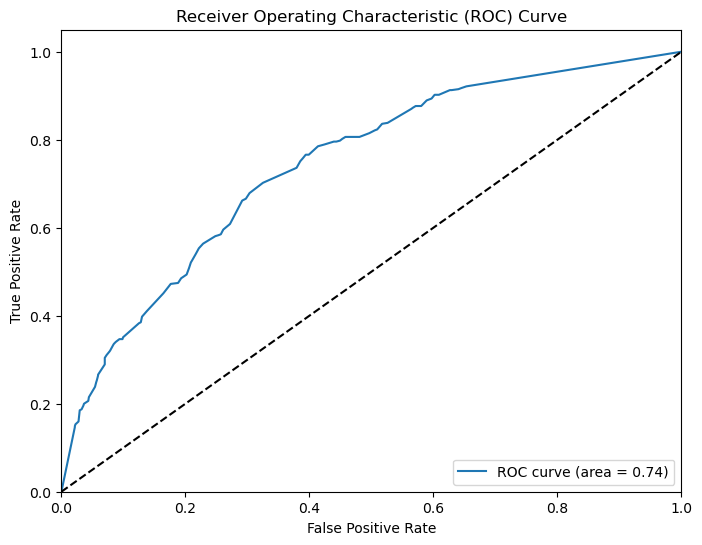

Train Accuracy: 0.8231430015159171
Test Accuracy: 0.7265993265993266
Confusion Matrix:
[[914 101]
 [305 165]]
ROC AUC Score: 0.7424263704014256


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Instantiate decision tree model
dt_classifier = DecisionTreeClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

# Train the model with best parameters
dt_classifier = DecisionTreeClassifier(**best_params)
dt_classifier.fit(X_train, y_train)

# Predictions
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

# Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
y_test_prob = dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Visualization (ROC Curve)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("ROC AUC Score:", roc_auc)



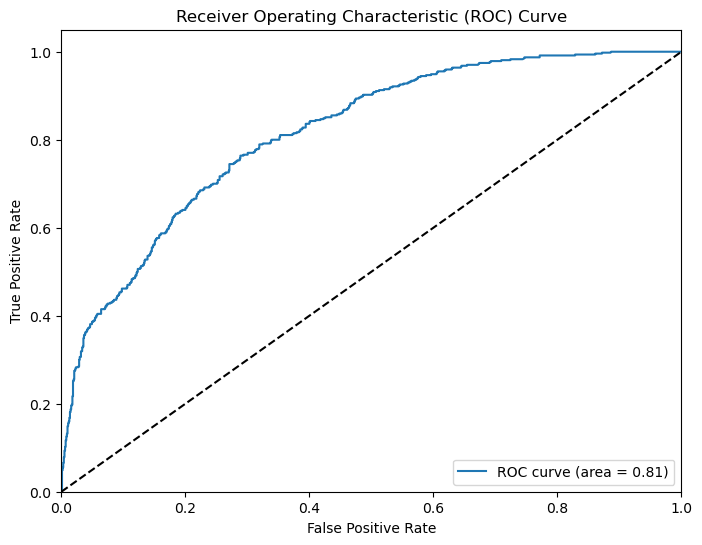

Train Accuracy: 0.8270170119589018
Test Accuracy: 0.7717171717171717
Confusion Matrix:
[[972  43]
 [296 174]]
ROC AUC Score: 0.8147269678230793


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate Random Forest classifier
rf_classifier = RandomForestClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

# Train the model with best parameters
rf_classifier = RandomForestClassifier(**best_params)
rf_classifier.fit(X_train, y_train)

# Predictions
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
y_test_prob = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Visualization (ROC Curve)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("ROC AUC Score:", roc_auc)


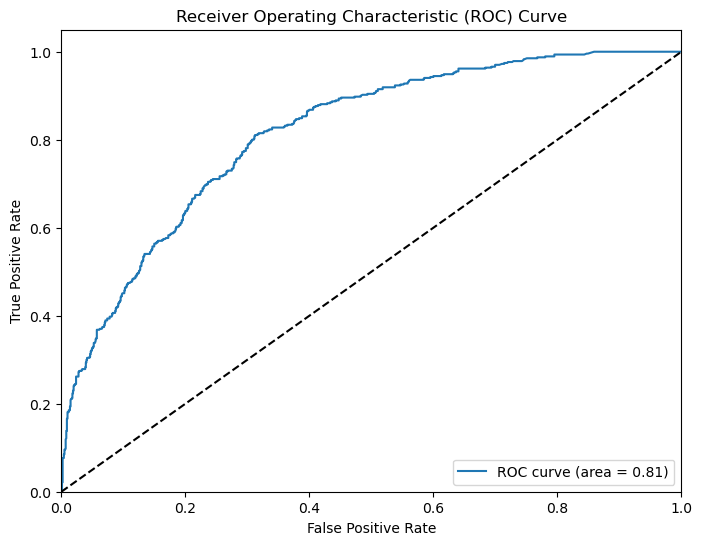

Train Accuracy: 0.7812026275896917
Test Accuracy: 0.7555555555555555
Confusion Matrix:
[[922  93]
 [270 200]]
ROC AUC Score: 0.814737448904727


In [12]:
from sklearn.ensemble import AdaBoostClassifier

# Instantiate AdaBoost classifier
adaboost_classifier = AdaBoostClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

# Train the model with best parameters
adaboost_classifier = AdaBoostClassifier(**best_params)
adaboost_classifier.fit(X_train, y_train)

# Predictions
y_train_pred = adaboost_classifier.predict(X_train)
y_test_pred = adaboost_classifier.predict(X_test)

# Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
y_test_prob = adaboost_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Visualization (ROC Curve)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("ROC AUC Score:", roc_auc)


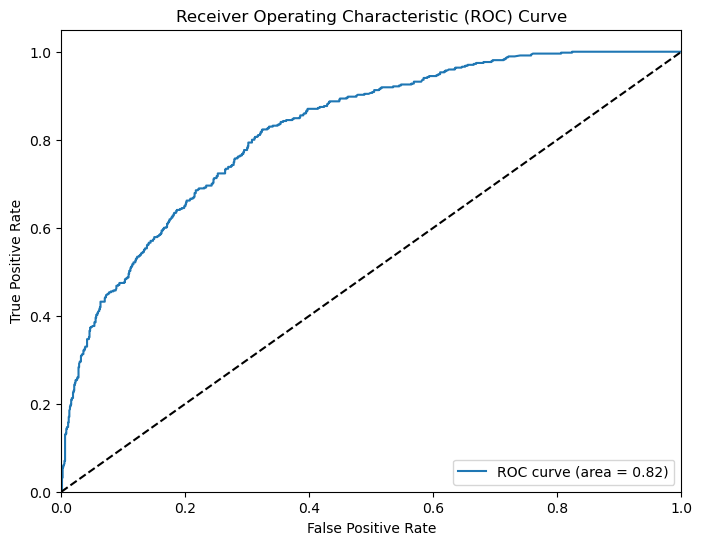

Train Accuracy: 0.8004042445679637
Test Accuracy: 0.7771043771043771
Confusion Matrix:
[[951  64]
 [267 203]]
ROC AUC Score: 0.8232323655801278


In [13]:
import xgboost as xgb

# Instantiate XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

# Train the model with best parameters
xgb_classifier = xgb.XGBClassifier(**best_params)
xgb_classifier.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

# Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
y_test_prob = xgb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Visualization (ROC Curve)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("ROC AUC Score:", roc_auc)



In [14]:
import pickle
pickle.dump(xgb_classifier,open('classifier.pkl','wb'))

In [15]:
pickeled_model=pickle.load(open('classifier.pkl','rb'))
